In [1]:
# understand the relationship between house features and how these variables affect the house price

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the data from xlsx file
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [4]:
# rename columns
df.rename(columns={'Distance from nearest Metro station (km)':'nearest Metro(km)','House price of unit area': 'Price'}, inplace=True)

In [5]:
df.describe()

,Transaction date,House Age,nearest Metro(km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
df.drop('Transaction date', axis=1, inplace=True)

In [7]:
df.isna().sum()

House Age                       0
nearest Metro(km)               0
Number of convenience stores    0
latitude                        0
longitude                       0
Number of bedrooms              0
House size (sqft)               0
Price                           0
dtype: int64

<AxesSubplot:>

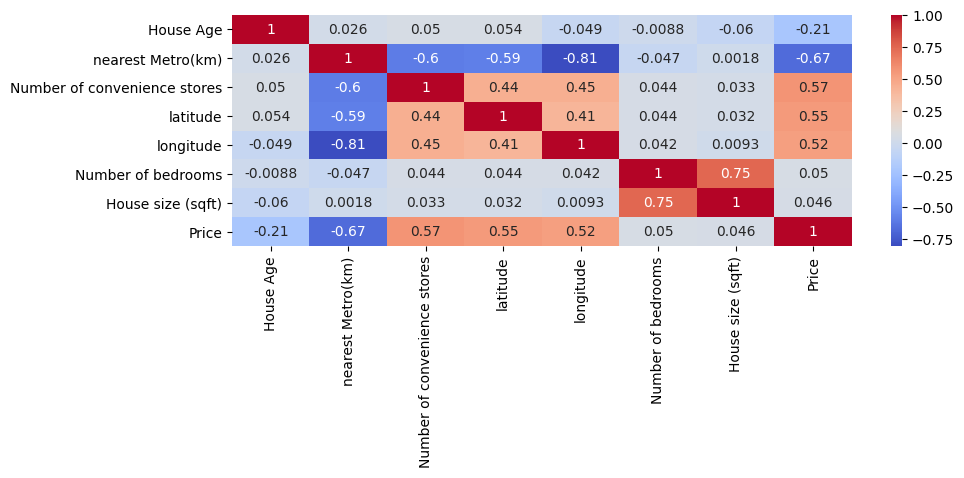

In [8]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='longitude', ylabel='Density'>

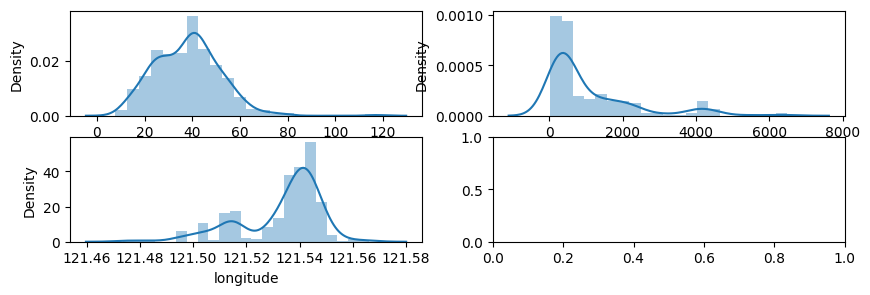

In [9]:
# check the distribution of the target variable
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(2, 2, figsize=(10, 3))
sns.distplot(df['Price'], ax=ax[0, 0])
sns.distplot(df['nearest Metro(km)'], ax=ax[0, 1])
sns.distplot(df['longitude'], ax=ax[1, 0])

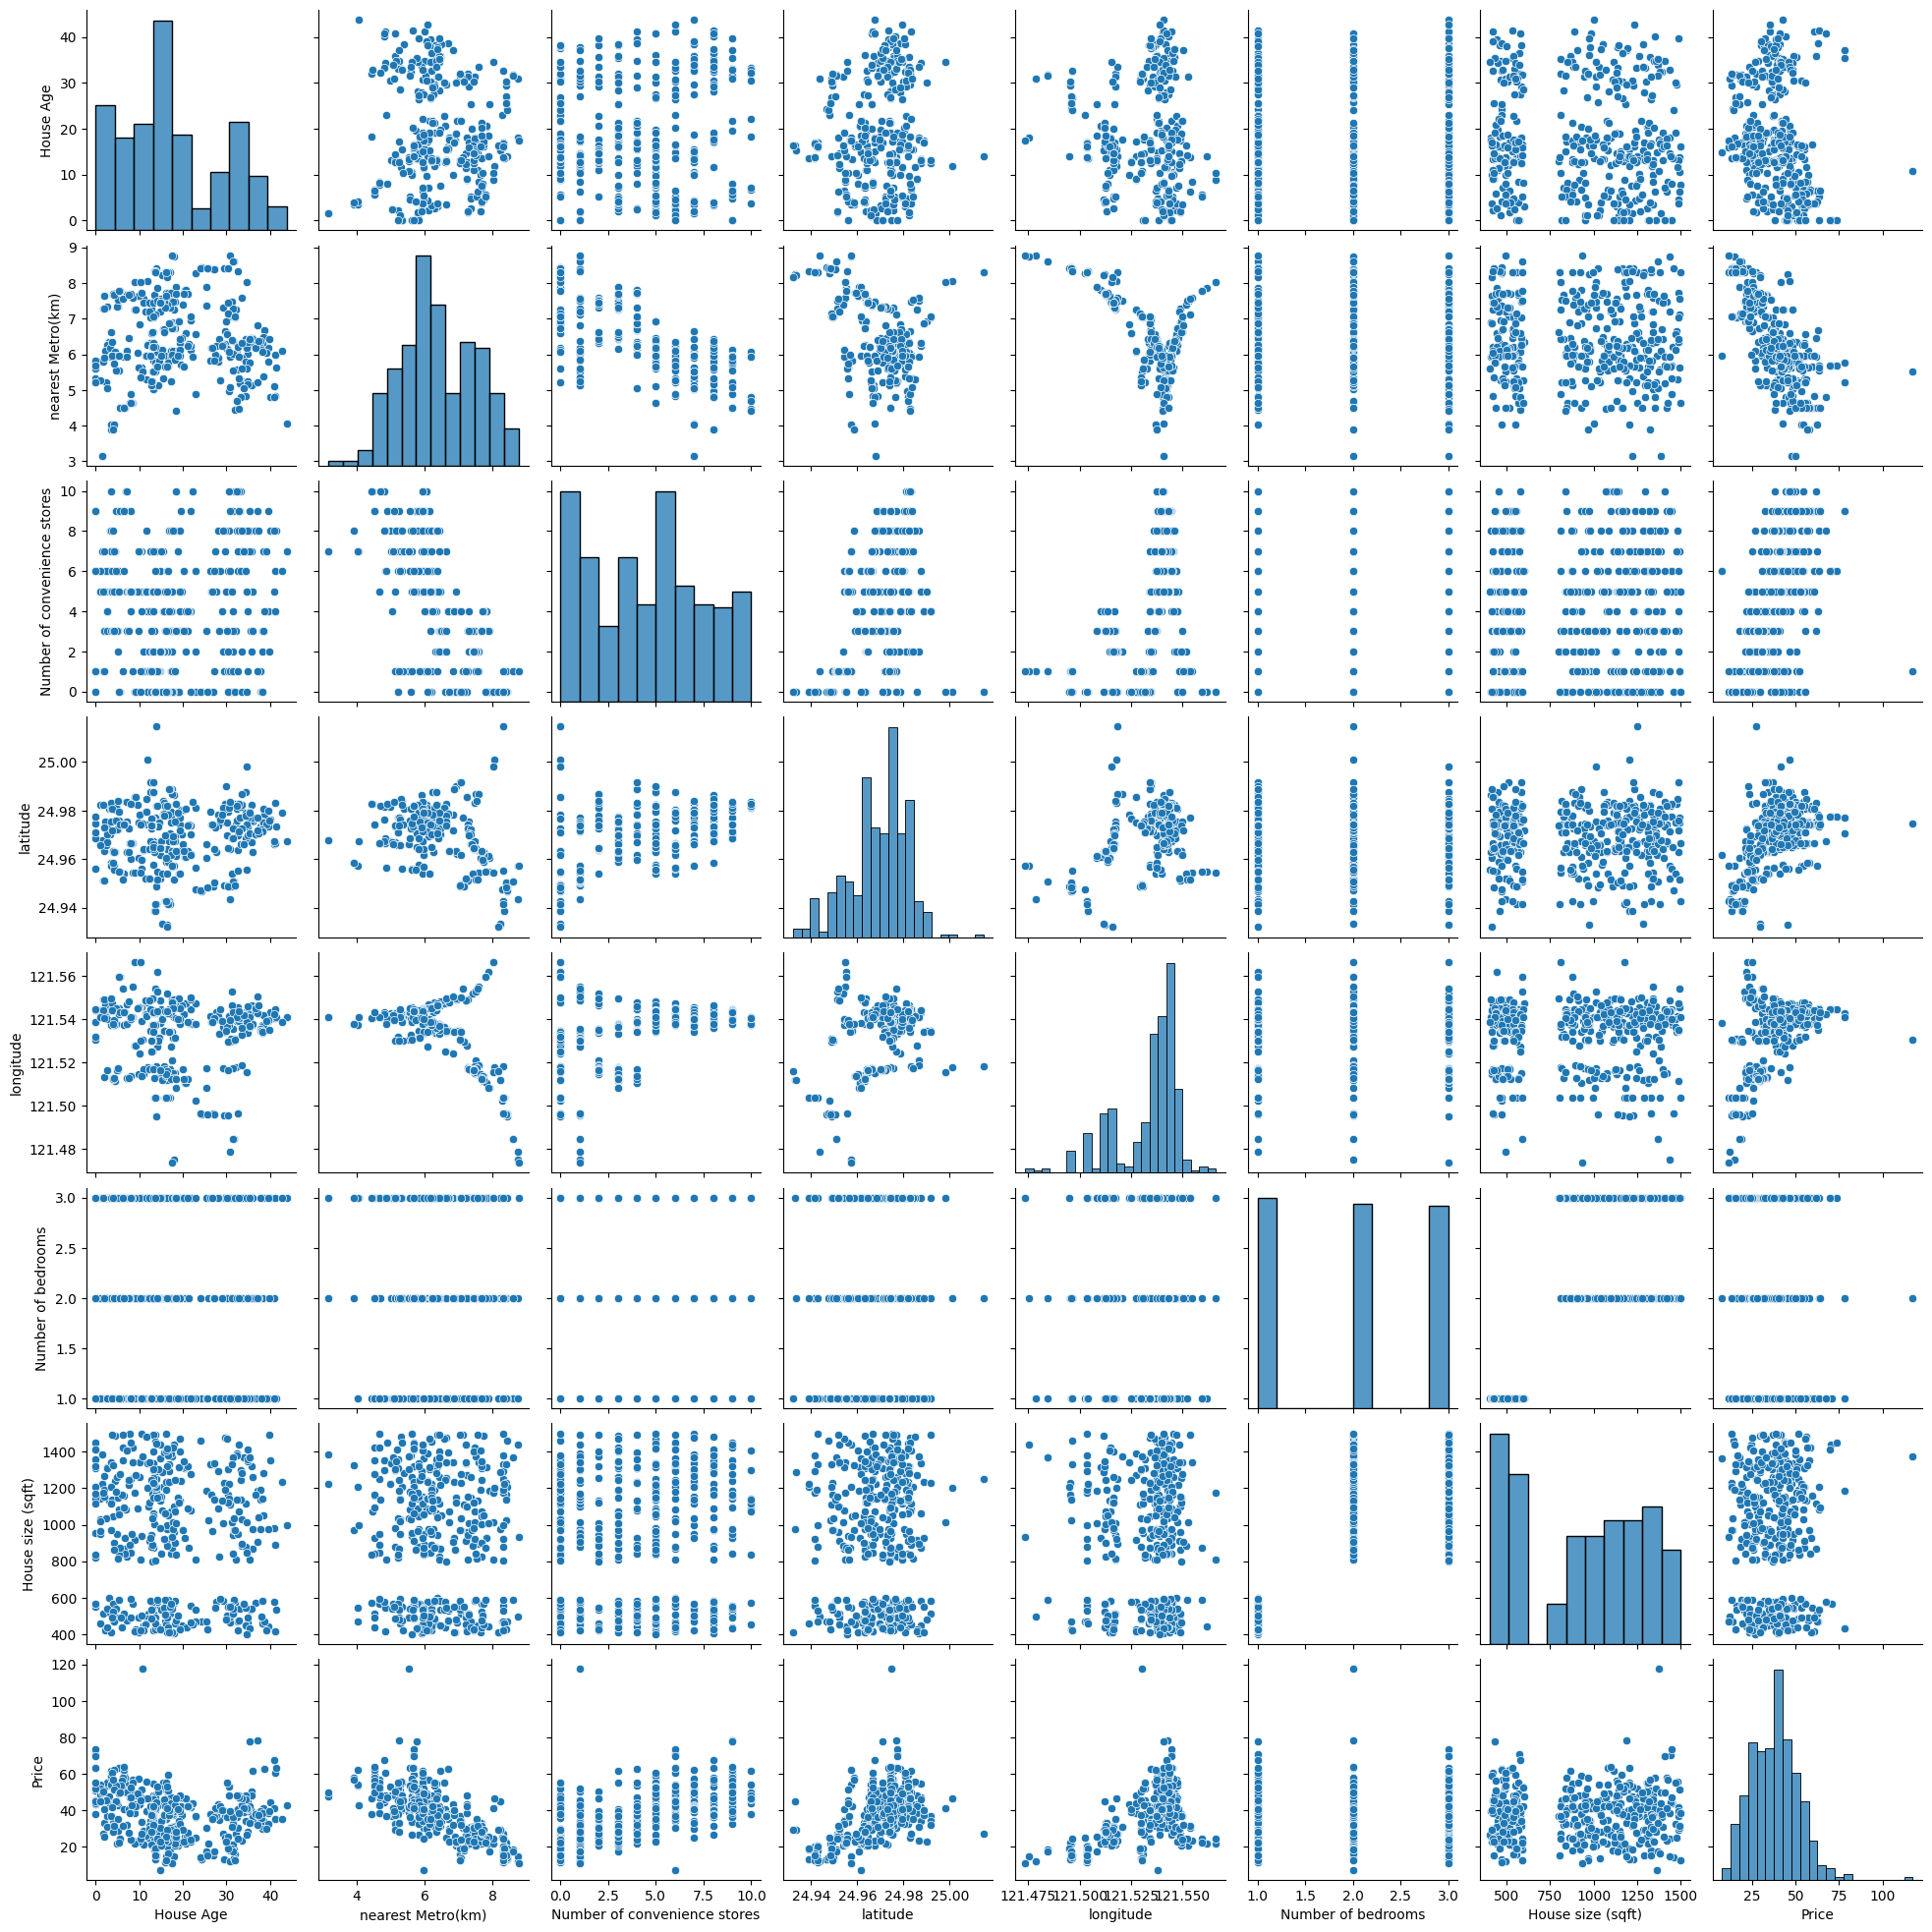

In [44]:
# scatter plot between the target variable and the independent variables
sns.pairplot(df)

In [11]:
df.columns

Index(['House Age', 'nearest Metro(km)', 'Number of convenience stores',
       'latitude', 'longitude', 'Number of bedrooms', 'House size (sqft)',
       'Price'],
      dtype='object')

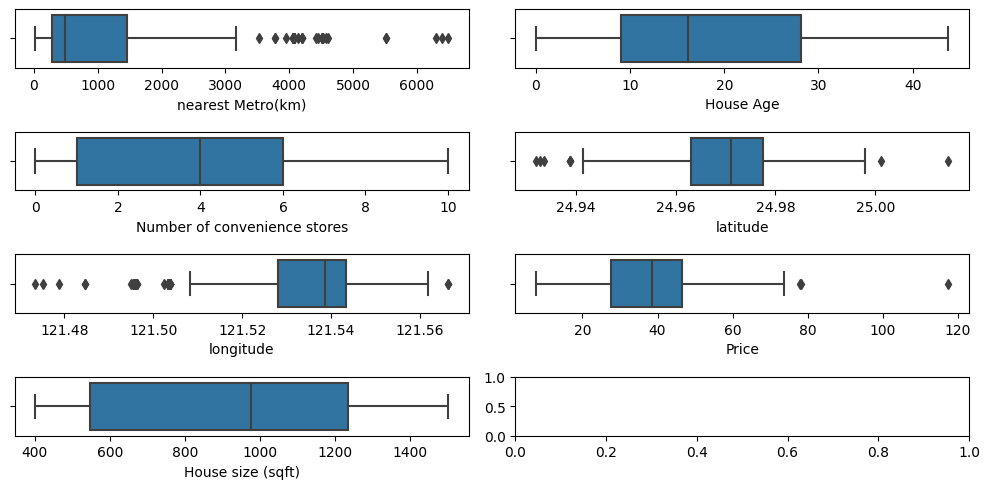

In [12]:
# outliers detection in all numerical columns
def detectOutliers():
    fig, axs = plt.subplots(4,2, figsize = (10,5))
    plt1 = sns.boxplot(df['nearest Metro(km)'], ax = axs[0][0])
    plt2 = sns.boxplot(df['House Age'], ax = axs[0][1])
    plt3 = sns.boxplot(df['Number of convenience stores'], ax = axs[1][0])
    plt4 = sns.boxplot(df['latitude'], ax = axs[1][1])
    plt5 = sns.boxplot(df['longitude'], ax = axs[2][0])
    plt6 = sns.boxplot(df['Price'], ax = axs[2][1])
    plt8 = sns.boxplot(df['House size (sqft)'], ax = axs[3][0])
    plt.tight_layout()
detectOutliers()


In [13]:
#remove outliers whose thresold is greater than 0.05
df['nearest Metro(km)'] = np.log(df['nearest Metro(km)'])

df.dropna(inplace=True)

df.shape

(414, 8)

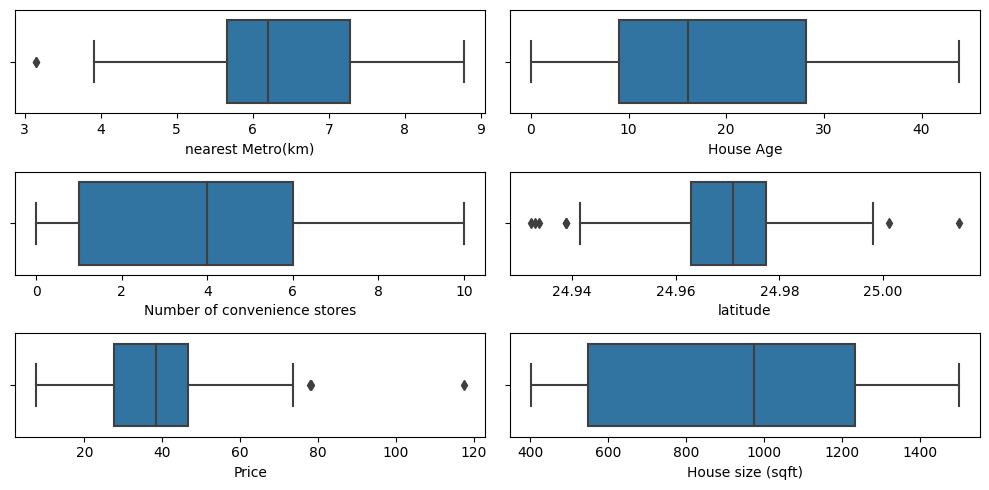

In [14]:
# outliers detection in all numerical columns
def detectOutliers():
    fig, axs = plt.subplots(3,2, figsize = (10,5))
    plt1 = sns.boxplot(df['nearest Metro(km)'], ax = axs[0][0])
    plt2 = sns.boxplot(df['House Age'], ax = axs[0][1])
    plt3 = sns.boxplot(df['Number of convenience stores'], ax = axs[1][0])
    plt4 = sns.boxplot(df['latitude'], ax = axs[1][1])
    plt6 = sns.boxplot(df['Price'], ax = axs[2][0])
    plt8 = sns.boxplot(df['House size (sqft)'], ax = axs[2][1])
    plt.tight_layout()
detectOutliers()

In [15]:
# split the data into train and test

from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [16]:
# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_std, y_train)

LinearRegression()

In [17]:
# predict the test data
predictions = lm.predict(X_test_std)

from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
print('Train score: %.2f' % lm.score(X_train_std, y_train))
print('Test score: %.2f' % lm.score(X_test_std, y_test))

Mean squared error: 51.16
Train score: 0.62
Test score: 0.70


Text(0, 0.5, 'Predicted Y')

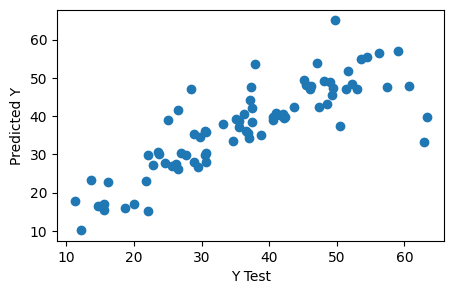

In [18]:
#plot the predicted values vs actual values
fig = plt.figure(figsize=(5,3))
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [19]:
# Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [20]:
# predict the test data
predictions = lasso.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
print('Train score: %.2f' % lasso.score(X_train, y_train))
print('Test score: %.2f' % lasso.score(X_test, y_test))

Mean squared error: 52.84
Train score: 0.61
Test score: 0.69


In [21]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# predict the test data
predictions = dt.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
print('Train score: %.2f' % dt.score(X_train, y_train))
print('Test score: %.2f' % dt.score(X_test, y_test))

Mean squared error: 62.08
Train score: 1.00
Test score: 0.63


In [22]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, random_state=42, max_depth=10, max_features='sqrt')
model = rf.fit(X_train, y_train)

# predict the test data
predictions = model.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
print('Train score: %.2f' % rf.score(X_train, y_train))
print('Test score: %.2f' % rf.score(X_test, y_test))


Mean squared error: 28.88
Train score: 0.94
Test score: 0.83


In [23]:
#extra tree regression
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(random_state=42,max_depth=10)
etr.fit(X_train, y_train)

# predict the test data
predictions = etr.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
print('Train score: %.2f' % etr.score(X_train, y_train))
print('Test score: %.2f' % etr.score(X_test, y_test))

Mean squared error: 31.53
Train score: 0.99
Test score: 0.81


In [24]:
# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)
model = gb.fit(X_train, y_train)

# predict the test data
predictions = model.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
print('Train score: %.2f' % gb.score(X_train, y_train))
print('Test score: %.2f' % gb.score(X_test, y_test))

Mean squared error: 34.51
Train score: 0.85
Test score: 0.79


In [25]:
#light gradient boosting
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=300, random_state=42, learning_rate=0.01)
model = lgbm.fit(X_train, y_train)

# predict the test data
predictions = model.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
print('Train score: %.2f' % lgbm.score(X_train, y_train))
print('Test score: %.2f' % lgbm.score(X_test, y_test))

Mean squared error: 37.14
Train score: 0.79
Test score: 0.78


In [26]:
# xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.012, n_estimators=300, random_state=42)
model = xgb.fit(X_train, y_train)

# predict the test data
predictions = model.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
print('Train score: %.2f' % xgb.score(X_train, y_train))
print('Test score: %.2f' % xgb.score(X_test, y_test))

Mean squared error: 33.69
Train score: 0.94
Test score: 0.80


In [27]:
# histgradient boosting
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
hgb = HistGradientBoostingRegressor( random_state=42, learning_rate=0.01, max_iter=300)
model = hgb.fit(X_train, y_train)

# predict the test data
predictions = model.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
print('Train score: %.2f' % hgb.score(X_train, y_train))
print('Test score: %.2f' % hgb.score(X_test, y_test))

Mean squared error: 33.67
Train score: 0.80
Test score: 0.80


In [28]:
# building a pipeline with cross validation for each regressor model
from sklearn.model_selection import cross_val_score
# pipline to fit data for all regression models
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# linear regression
pipe_lm = Pipeline([('scl', StandardScaler()), ('clf', LinearRegression())])
# lasso regression
pipe_lasso = Pipeline([('scl', StandardScaler()), ('clf', Lasso(alpha=0.01))])
# random forest
pipe_rf = Pipeline([('scl', StandardScaler()), ('clf', RandomForestRegressor(n_estimators=300, random_state=43))])
# gradient boosting
pipe_gb = Pipeline([('scl', StandardScaler()), ('clf', GradientBoostingRegressor(n_estimators=300, random_state=42))])
# xgboost
pipe_xgb = Pipeline([('scl', StandardScaler()), ('clf', XGBRegressor(n_estimators=300, random_state=42, learning_rate=0.015, max_depth=3,min_child_weight=0.5, gamma=0.5, subsample=0.5,reg_alpha=0.5, reg_lambda=0.5))])

pipelines = [pipe_lm, pipe_lasso, pipe_rf, pipe_gb, pipe_xgb]

# dictionary of pipelines and regressor types for ease of reference
pipe_dict = {0: 'Linear Regression', 1: 'Lasso Regression', 2: 'Random Forest', 3: 'Gradient Boosting', 4: 'XGBoost', 5: 'Light Gradient Boosting'}

# fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_std, y_train)

# compare accuracies
for i,model in enumerate(pipelines):
    print("{} Train Accuracy: {}".format(pipe_dict[i],model.score(X_train_std, y_train)))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test_std, y_test)))


# cross validation
for i,model in enumerate(pipelines):
    print("{} Cross Validation Accuracy: {}".format(pipe_dict[i],cross_val_score(model, X_train_std, y_train, cv=5).mean()))

# best model
best_acc = 0
best_regressor = 0
best_pipeline = ""

for i,model in enumerate(pipelines):
    if model.score(X_test_std, y_test) > best_acc:
        best_acc = model.score(X_test_std, y_test)
        best_pipeline = model
        best_regressor = i
print('Regressor with best accuracy: {}'.format(pipe_dict[best_regressor]))


Linear Regression Train Accuracy: 0.61770882067904
Linear Regression Test Accuracy: 0.6950232679688881
Lasso Regression Train Accuracy: 0.6177042549610722
Lasso Regression Test Accuracy: 0.6956422957280637
Random Forest Train Accuracy: 0.9508906910162097
Random Forest Test Accuracy: 0.7992306383657157
Gradient Boosting Train Accuracy: 0.9846019264313194
Gradient Boosting Test Accuracy: 0.7356222257725321
XGBoost Train Accuracy: 0.8646701442021255
XGBoost Test Accuracy: 0.8129491983536872
Linear Regression Cross Validation Accuracy: 0.5883854685295488
Lasso Regression Cross Validation Accuracy: 0.5890180584804406
Random Forest Cross Validation Accuracy: 0.6218593062861972
Gradient Boosting Cross Validation Accuracy: 0.5911014296437458
XGBoost Cross Validation Accuracy: 0.6355969238321482
Regressor with best accuracy: XGBoost


In [29]:
# reproducibility of the result using seed
# Set a seed value
seed_value= 42 
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, random_state=42)
    rf.fit(X_train, y_train)
    return rf.score(X_test, y_test)

sampler = optuna.samplers.TPESampler(seed=seed_value)
rf_study = optuna.create_study(direction='maximize',sampler=sampler)
rf_study.optimize(objective, n_trials=20,n_jobs=-1)

[I 2022-12-06 19:49:54,393] A new study created in memory with name: no-name-fc23cea4-3731-4fd3-9afb-5d20fe6515ca
[I 2022-12-06 19:49:57,247] Trial 2 finished with value: 0.8268189767005747 and parameters: {'n_estimators': 287, 'max_depth': 15, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.8268189767005747.
[I 2022-12-06 19:49:58,855] Trial 1 finished with value: 0.8258186689991792 and parameters: {'n_estimators': 450, 'max_depth': 12, 'max_features': 'log2'}. Best is trial 2 with value: 0.8268189767005747.
[I 2022-12-06 19:49:58,977] Trial 0 finished with value: 0.8263896136056066 and parameters: {'n_estimators': 448, 'max_depth': 14, 'max_features': 'log2'}. Best is trial 2 with value: 0.8268189767005747.
[I 2022-12-06 19:49:59,361] Trial 3 finished with value: 0.8264892010591858 and parameters: {'n_estimators': 467, 'max_depth': 14, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.8268189767005747.
[I 2022-12-06 19:50:00,105] Trial 5 finished with value: 0.82439174426

In [30]:
print('Best trial:', rf_study.best_trial.params)
print('Best score:', rf_study.best_value)

Best trial: {'n_estimators': 1000, 'max_depth': 9, 'max_features': 'log2'}
Best score: 0.83081946118942


In [31]:
# optimizing extra trees using optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    max_features = trial.suggest_categorical('max_features', ['auto','sqrt', 'log2'])
    etr = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, random_state=42)
    etr.fit(X_train, y_train)
    return etr.score(X_test, y_test)

etr_study = optuna.create_study(direction='maximize')
etr_study.optimize(objective, n_trials=20)

[I 2022-12-06 19:50:28,426] A new study created in memory with name: no-name-63b7ed8e-9ec1-4960-b279-f5b201a41807
[I 2022-12-06 19:50:28,897] Trial 0 finished with value: 0.7995235628635807 and parameters: {'n_estimators': 200, 'max_depth': 14, 'max_features': 'log2'}. Best is trial 0 with value: 0.7995235628635807.
[I 2022-12-06 19:50:30,182] Trial 1 finished with value: 0.8019394679093368 and parameters: {'n_estimators': 706, 'max_depth': 10, 'max_features': 'log2'}. Best is trial 1 with value: 0.8019394679093368.
[I 2022-12-06 19:50:31,203] Trial 2 finished with value: 0.7758734747510099 and parameters: {'n_estimators': 780, 'max_depth': 7, 'max_features': 'log2'}. Best is trial 1 with value: 0.8019394679093368.
[I 2022-12-06 19:50:31,805] Trial 3 finished with value: 0.8165312799190285 and parameters: {'n_estimators': 324, 'max_depth': 9, 'max_features': 'auto'}. Best is trial 3 with value: 0.8165312799190285.
[I 2022-12-06 19:50:33,007] Trial 4 finished with value: 0.8084705947463

In [32]:
print('Best trial:', etr_study.best_trial.params)
print('Best score:', etr_study.best_value)

Best trial: {'n_estimators': 489, 'max_depth': 9, 'max_features': 'auto'}
Best score: 0.818989603228857


In [33]:
# gradient boosting using optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'max_features': trial.suggest_categorical('max_features', ['auto','sqrt', 'log2']),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.012,0.1]),
        'random_state': 42
    }
    gb = GradientBoostingRegressor(**params)
    gb.fit(X_train, y_train)
    return gb.score(X_test, y_test)

sampler = optuna.samplers.TPESampler(seed=seed_value)
gb_study = optuna.create_study(direction='maximize',sampler = sampler)
gb_study.optimize(objective, n_trials=20, n_jobs=-1)

[I 2022-12-06 19:50:45,228] A new study created in memory with name: no-name-4c536e2c-4501-49f3-b77f-053484a304ab
[I 2022-12-06 19:50:45,940] Trial 2 finished with value: 0.8134887319263601 and parameters: {'n_estimators': 306, 'max_depth': 7, 'max_features': 'sqrt', 'learning_rate': 0.012}. Best is trial 2 with value: 0.8134887319263601.
[I 2022-12-06 19:50:46,184] Trial 0 finished with value: 0.8001337314784254 and parameters: {'n_estimators': 736, 'max_depth': 13, 'max_features': 'sqrt', 'learning_rate': 0.1}. Best is trial 2 with value: 0.8134887319263601.
[I 2022-12-06 19:50:46,578] Trial 1 finished with value: 0.8181663126720727 and parameters: {'n_estimators': 449, 'max_depth': 9, 'max_features': 'sqrt', 'learning_rate': 0.1}. Best is trial 1 with value: 0.8181663126720727.
[I 2022-12-06 19:50:46,931] Trial 5 finished with value: 0.8363462668582473 and parameters: {'n_estimators': 430, 'max_depth': 5, 'max_features': 'sqrt', 'learning_rate': 0.01}. Best is trial 5 with value: 0.

In [34]:
print('Best trial:', gb_study.best_trial.params)
print('Best score:', gb_study.best_value)

Best trial: {'n_estimators': 430, 'max_depth': 5, 'max_features': 'sqrt', 'learning_rate': 0.01}
Best score: 0.8363462668582473


In [35]:
# histgradient boosting using optuna
def objective(trial):
    params = {
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 5, 15),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.012,0.1]),
        'max_bins': trial.suggest_int('max_bins', 2, 255),
        'random_state': 42
    }
    hgb = HistGradientBoostingRegressor(**params)
    hgb.fit(X_train, y_train)
    return hgb.score(X_test, y_test)

sampler = optuna.samplers.TPESampler(seed=seed_value)
hgb_study = optuna.create_study(direction='maximize',sampler = sampler)
hgb_study.optimize(objective, n_trials=20, n_jobs=-1)

[I 2022-12-06 19:50:53,274] A new study created in memory with name: no-name-f3208bde-10e1-43bf-afcf-f6c1112d4381
[I 2022-12-06 19:50:56,922] Trial 2 finished with value: 0.77802708961359 and parameters: {'max_iter': 365, 'max_depth': 10, 'max_leaf_nodes': 12, 'learning_rate': 0.01, 'max_bins': 27}. Best is trial 2 with value: 0.77802708961359.
[I 2022-12-06 19:50:59,947] Trial 1 finished with value: 0.7992509199425009 and parameters: {'max_iter': 973, 'max_depth': 11, 'max_leaf_nodes': 7, 'learning_rate': 0.012, 'max_bins': 188}. Best is trial 1 with value: 0.7992509199425009.
[I 2022-12-06 19:51:01,443] Trial 5 finished with value: 0.7803269232831942 and parameters: {'max_iter': 160, 'max_depth': 12, 'max_leaf_nodes': 10, 'learning_rate': 0.012, 'max_bins': 73}. Best is trial 1 with value: 0.7992509199425009.
[I 2022-12-06 19:51:02,119] Trial 0 finished with value: 0.7943013222052917 and parameters: {'max_iter': 944, 'max_depth': 6, 'max_leaf_nodes': 13, 'learning_rate': 0.012, 'max_

In [36]:
print('Best trial:', hgb_study.best_trial.params)
print('Best score:', hgb_study.best_value)

Best trial: {'max_iter': 772, 'max_depth': 14, 'max_leaf_nodes': 5, 'learning_rate': 0.05, 'max_bins': 142}
Best score: 0.8218500263929962


In [37]:
# hyper parameter tuning xgboost using optuna
import optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01,0.1,0.012]),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'gamma': trial.suggest_uniform('gamma', 0.01, 1),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.8, 0.9]),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 0.1, 1),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.1, 1),
    }
    model = XGBRegressor(**params)
    model.fit(X_train_std, y_train)
    return model.score(X_test_std, y_test)

sampler = optuna.samplers.TPESampler(seed=42)
xgb_study = optuna.create_study(direction='maximize',sampler=sampler)
xgb_study.optimize(objective, n_trials=20, n_jobs=-1)
print('Number of finished trials:', len(xgb_study.trials))
print('Best trial:', xgb_study.best_trial.params)

[I 2022-12-06 19:51:20,072] A new study created in memory with name: no-name-da9ad8fb-2f47-48d3-8f2f-51c9c23a58f0
[I 2022-12-06 19:51:20,821] Trial 3 finished with value: 0.6901251629931711 and parameters: {'n_estimators': 211, 'learning_rate': 0.01, 'max_depth': 7, 'gamma': 0.5813095175854629, 'subsample': 0.8, 'reg_alpha': 0.2224831127495241, 'reg_lambda': 0.4837352537694569}. Best is trial 3 with value: 0.6901251629931711.
[I 2022-12-06 19:51:20,895] Trial 0 finished with value: 0.7331881607155664 and parameters: {'n_estimators': 192, 'learning_rate': 0.012, 'max_depth': 10, 'gamma': 0.706629182444203, 'subsample': 0.5, 'reg_alpha': 0.6906205807865025, 'reg_lambda': 0.11785160233663061}. Best is trial 0 with value: 0.7331881607155664.
[I 2022-12-06 19:51:21,250] Trial 5 finished with value: 0.7991233223529595 and parameters: {'n_estimators': 127, 'learning_rate': 0.1, 'max_depth': 6, 'gamma': 0.44287152430965565, 'subsample': 0.8, 'reg_alpha': 0.40161289272008094, 'reg_lambda': 0.74

Number of finished trials: 20
Best trial: {'n_estimators': 415, 'learning_rate': 0.01, 'max_depth': 7, 'gamma': 0.2726284208742012, 'subsample': 0.5, 'reg_alpha': 0.9757634835892594, 'reg_lambda': 0.5052212097326702}


In [38]:
print('Best score: {}'.format(xgb_study.best_value))

Best score: 0.8276060579830087


In [39]:
xgb_model = XGBRegressor(**xgb_study.best_params)
xgb_model.fit(X_train_std, y_train)
print('Train score: {}'.format(xgb_model.score(X_train_std, y_train)))
print('Test score: {}'.format(xgb_model.score(X_test_std, y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, xgb_model.predict(X_test_std))))

Train score: 0.9376033105728767
Test score: 0.8276060579830087
mean_squared_error: 28.920763669609215


In [40]:
rf_model = RandomForestRegressor(**rf_study.best_params)
rf_model.fit(X_train_std, y_train)
print('Train score: {}'.format(rf_model.score(X_train_std, y_train)))
print('Test score: {}'.format(rf_model.score(X_test_std, y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, rf_model.predict(X_test_std))))

Train score: 0.9359287852553793
Test score: 0.8316940633481094
mean_squared_error: 28.23496093396251


In [41]:
gb_model = GradientBoostingRegressor(**gb_study.best_params)
gb_model.fit(X_train_std, y_train)
print('Train score: {}'.format(gb_model.score(X_train_std, y_train)))
print('Test score: {}'.format(gb_model.score(X_test_std, y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, gb_model.predict(X_test_std))))

Train score: 0.9583563543211021
Test score: 0.8309397700813697
mean_squared_error: 28.361500979684113


In [42]:
etr_model = ExtraTreesRegressor(**etr_study.best_params)
etr_model.fit(X_train_std, y_train)
print('Train score: {}'.format(etr_model.score(X_train_std, y_train)))
print('Test score: {}'.format(etr_model.score(X_test_std, y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, etr_model.predict(X_test_std))))

Train score: 0.9728134415866808
Test score: 0.8200733331033492
mean_squared_error: 30.1844516709622


In [43]:
hgb_model = HistGradientBoostingRegressor(**hgb_study.best_params)
hgb_model.fit(X_train_std, y_train)
print('Train score: {}'.format(hgb_model.score(X_train_std, y_train)))
print('Test score: {}'.format(hgb_model.score(X_test_std, y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, hgb_model.predict(X_test_std))))

Train score: 0.9281139513420629
Test score: 0.8218500263929962
mean_squared_error: 29.886394058600185


<h2> Final Model for prediction - Random Forest </h2>
<ul><li> Random Forest does the optimum splits while building multiple decision trees models and is quite fast to train as all trees are trained parallely</li>
<li>Boosting techniques are also performing quite good and also the mean_squared_error is also low compared to other regression techniques</li>
<li> <b>We can also use XGBoost regressor as the Training and Testing score are alsmost similar to RandomForestRegressor</b></li>
<li> Optimizing the hyperparameters using optuna made quite easy to compare Fine Tuned Models and the one with least mean squared error is Random Forest and XGBoost regressor for the given problem </li></ul>
